# Exploration and analysis of credit data in SQL language

Dataset available at the link: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

### The data
The data is information from bank customers, arranged as follows:


*   id - customer ID in the database
*   age - customer age
*   default - 0 for defaulting, 1 for defaulter
*   gender - gender of the customer (M or F)
*   dependents - number of dependents of the client
*   education - level of education of the client
*   marital_status - customer's marital status
*   salario_anual - sum of the client's salary in 12 months
*   card_type - customer's credit card type
*   months_of_relationship - length of relationship between the
    customer and the bank
*   qty_products - number of contracted products
*   iterations_12m - number of customer interactions in 12 months
*   months_inactive_12m - inactive time
*   limit_credit - customer credit limit
*   value_transacoes_12m - value of customer transactions in 12 months
*   quantity_transacoes_12m - number of customer transactions in 12
    months
















### Data exploration
The first step is to understand what we have available for analysis.

### What are the data?
Query:

    select * from credito limit 10

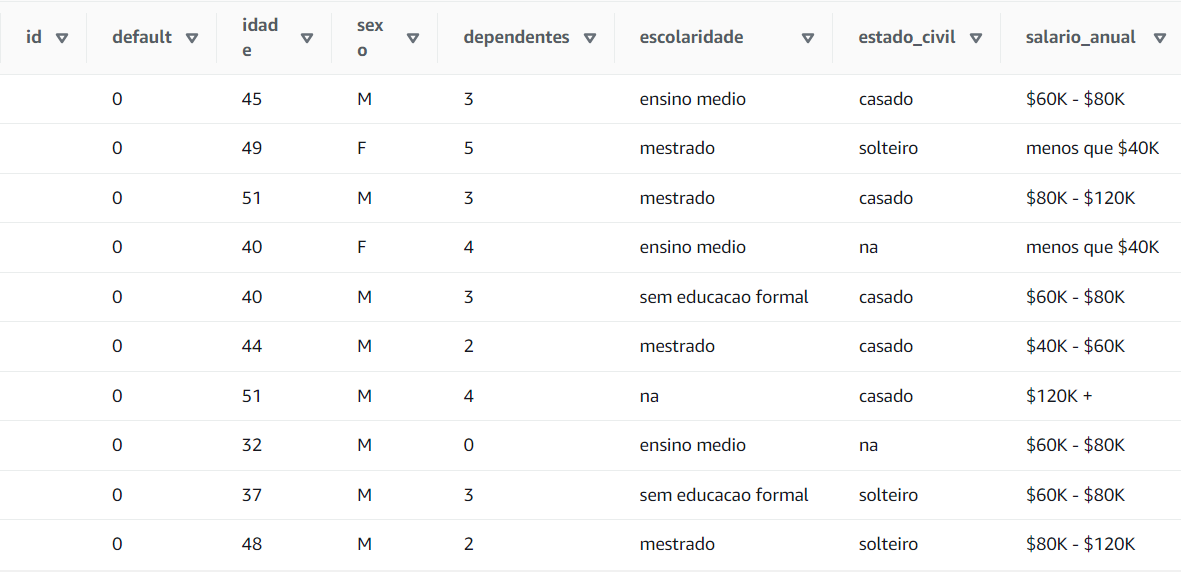

### Amount of information available in the database
Query:

    select count(id) from credito

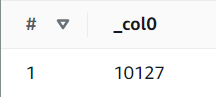

### Type data
Query:

    describe credito

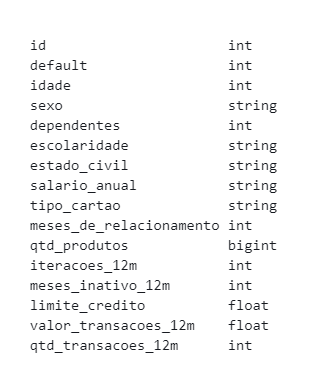

### Analysis of non-numeric data types
Level of education available in the dataset

Query:

    select distinct escolaridade from credito

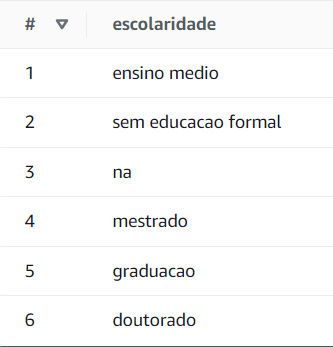

Marital states available in the dataset

Query:

    select distinct estado_civil from credito

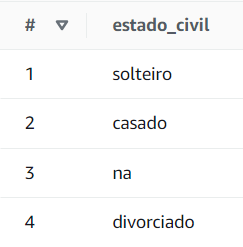

Annual salary range available in the dataset

Query:

    select distinct salário_anual from credito

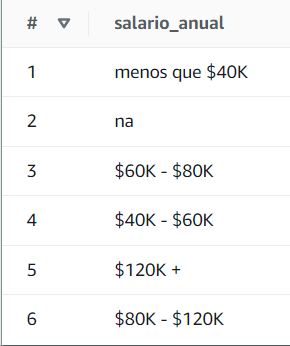

Customer card segments in the dataset

Query:
    
    select distinct tipo_cartao from credito

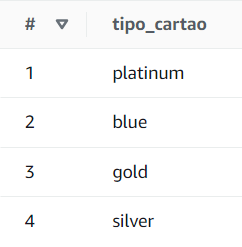

### Data cleaning
As identified in the validations of the information available in the dataset, many records are incomplete and this makes a more accurate analysis difficult. Cleaning the data is necessary to generate an analysis faithful to the study of the proposed problem.
Counting the incomplete records, we identified 3046, which corresponds to 30.08% of data loss of the total dadset, so we have a clean base with 7081 valid records to analyze.

Query:

    select count() from credito
          where salario_anual = 'na'
            or escolaridade = 'na'
            or estado_civil = 'na'
            or sexo = 'na'

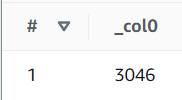

To extract only the complete dataset records, a "creditolimpo" view was created.

Query:

    create view creditolimpo as select * from credito
      where salario_anual != 'na'
          and escolaridade != 'na'
          and estado_civil != 'na'
          and sexo != 'na'
          and sexo != 'sexo'

### Data analysis
After exploring and cleaning the data for prior knowledge, we started the analysis by identifying the total audience by gender.

Query:

    select count(sexo) as quantidade, sexo from credito
       group by sexo

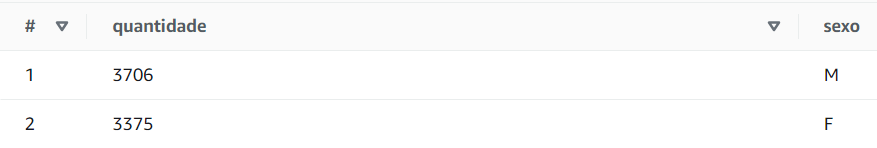

In the first analysis of clients by sex, we observed the balance of data in this dataset, although the number of men is slightly higher than the number of women.

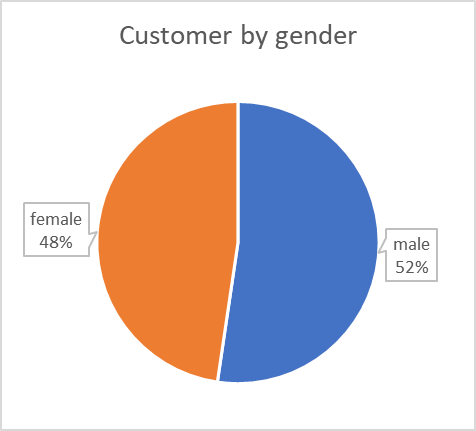

Analysis of customers by salary range
Query:

    select count(*) as quantidade, salario_anual from creditolimpo
      group by salario_anual
      order by quantidade

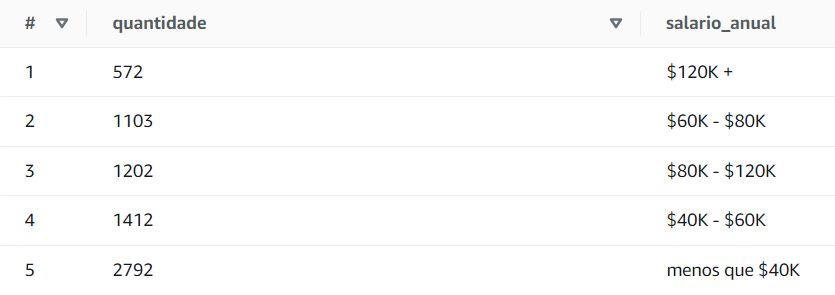

Analyzing customers by annual salary range, we identified 5 groups, of which the group whose salary range is less than 40,000.00 per year stands out with the highest number of customers.

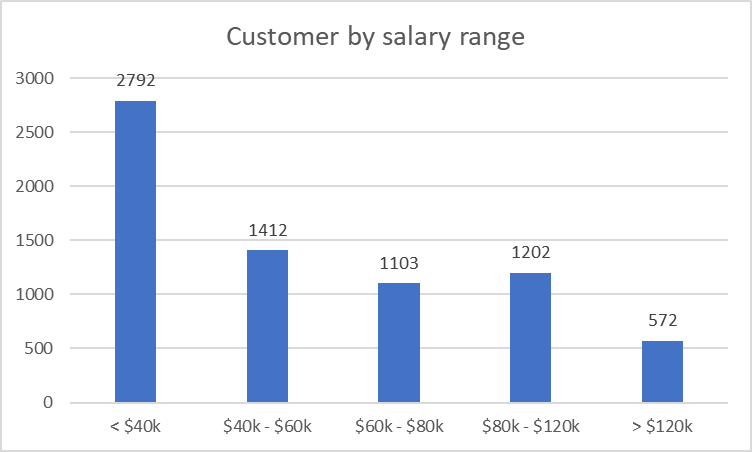

Correlation analysis of education level with annual salary

Query:

    select escolaridade, count(salario_anual) as quantidade, salario_anual from creditolimpo
      group by escolaridade, salario_anual
      order by salario_anual, quantidade

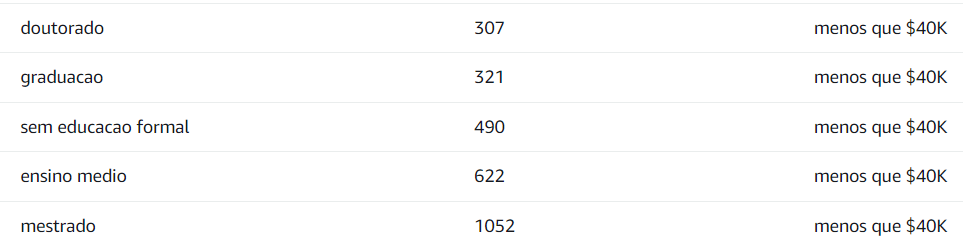

We observed that the largest number of clients with an annual salary range of less than 40,000.00 have a master's degree, at first we can deduce that these clients do not work in their area of ​​specialization, however, another more specific analysis is suggested.

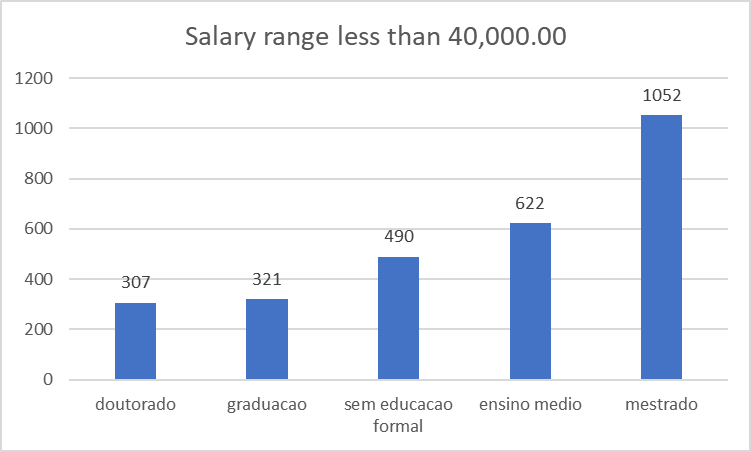

In the second salary range between 40,000.00 and 60,000.00, we observed the same behavior between levels of education, but with closer values ​​between them.

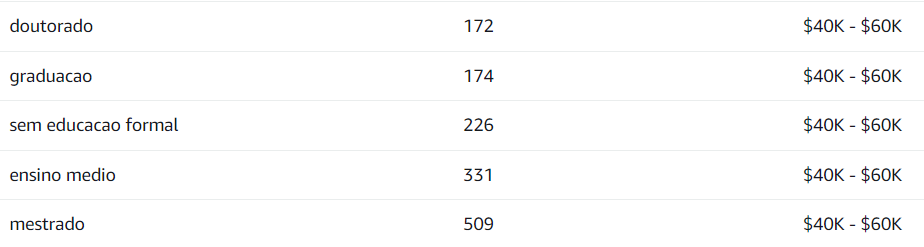

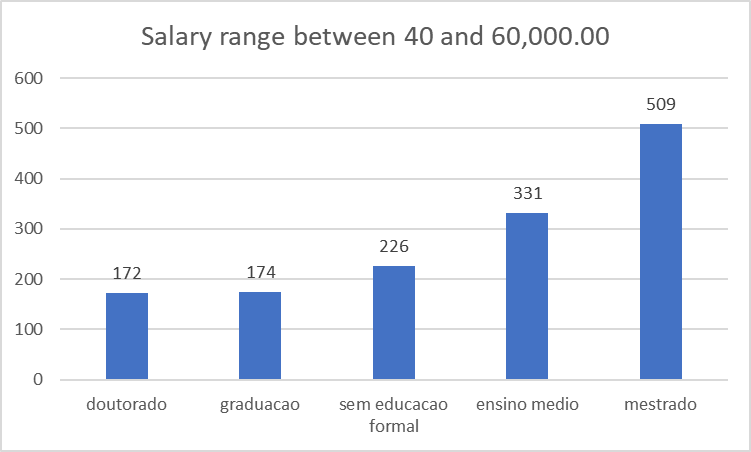

In the salary range between 60 and 80,000.00 there was a slight change between the undergraduate and doctoral education levels, however, without relevance for the analysis.

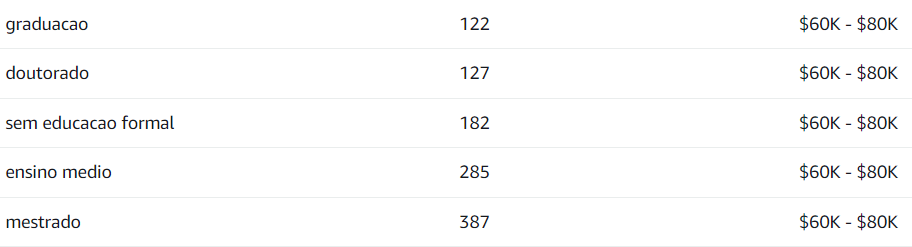

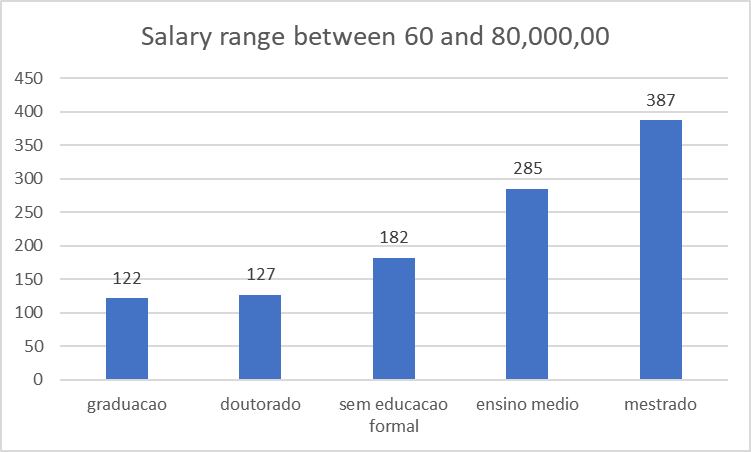

In the range between 80 and 120,000.00 the data are unchanged.

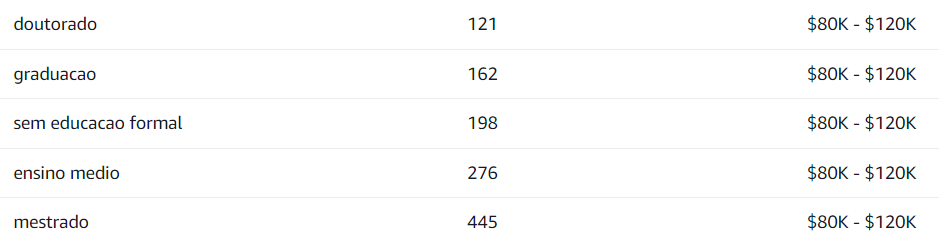

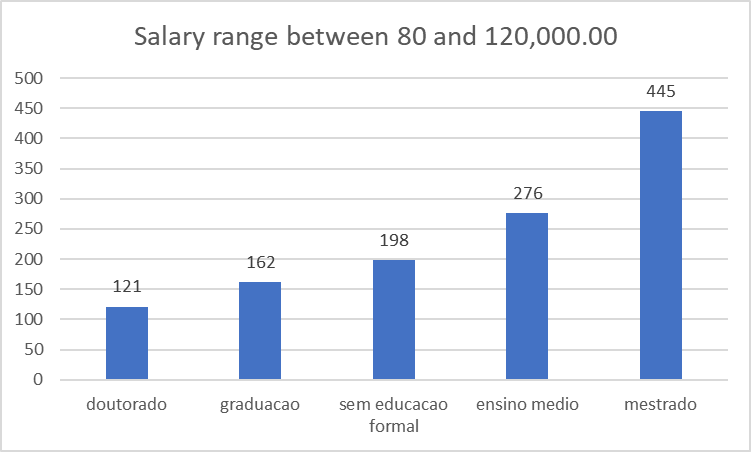

In this range remains the standard.

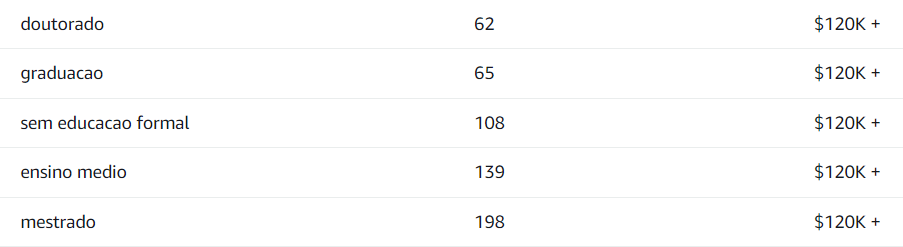

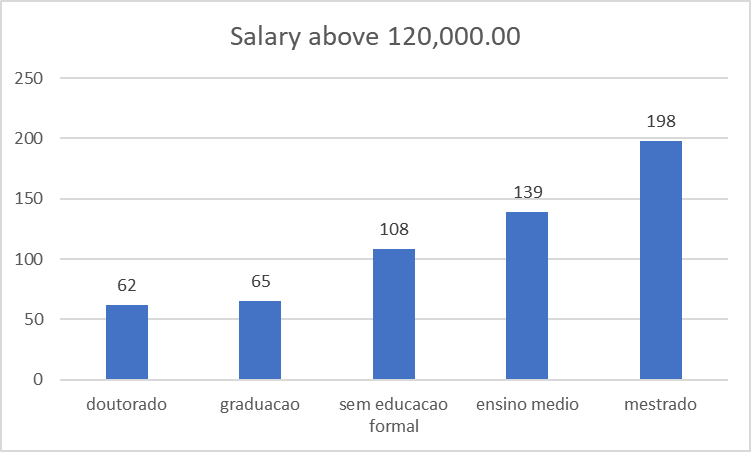

According to the correlation analysis between salary range and education level, we identified that all levels are found in all ranges, but secondary and non-formal education levels always remain in second and third place. We can conclude that this correlation certainly does not influence the granting of credit to customers.

Dataset analysis by age
Query:

    select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito
      group by sexo

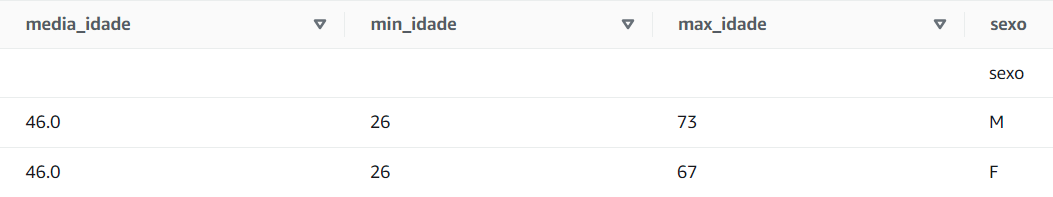

The average ages and minimum ages of customers are exactly the same between males and females, there is only a difference in maximum ages between genders, but not much, we can conclude that this data also does not influence the granting of credit.

Analysis by salary range
Query:

    select salario_anual, round(avg(limite_credito),5) as   
      media_limite_credito from creditolimpo
      group by salario_anual
      order by media_limite_credito

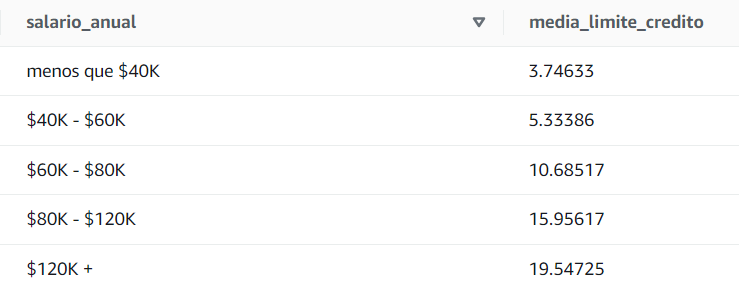

In this analysis we can identify that the higher the salary range, the higher the credit limit released to the customer.

Profile of the customer with the highest credit limit

Query:

    select max(limite_credito) as limite_credito, escolaridade,
     tipo_cartao from creditolimpo
     group by escolaridade, tipo_cartao
     order by limite_credito desc limit 14

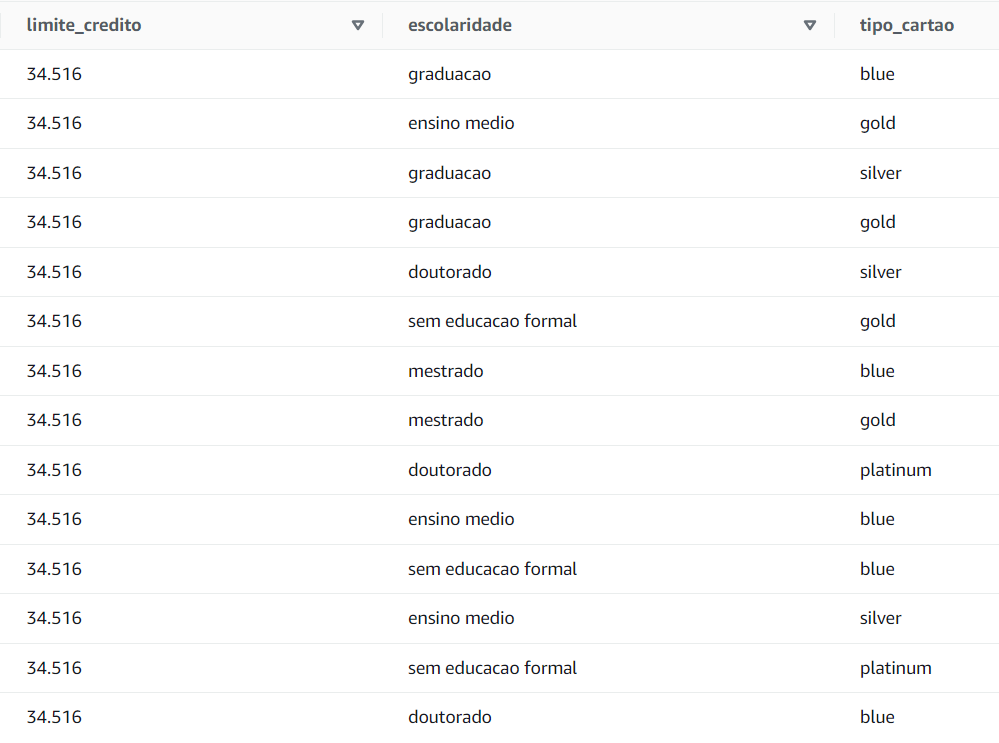

As already identified at the beginning of this analysis, all levels of education are related to all annual salary ranges available in this dataset, so the type of credit card is diversified between salary ranges and levels of education, with very close credit limits.

### Conclusion

*   Most customers have annual income up to 40,000.00
*   There is a balance between clients, with a slight predominance of males.
*   Level of education is not included in the credit limit
*   Education levels are distributed across all salary ranges
*   In all salary ranges, the second and third largest groups are clients with high school and without formal education, respectively.
*   The credit limit is associated with the salary range





